<a href="https://colab.research.google.com/github/LINU0/Algorithm_Midterm_Exam/blob/main/matrix_chain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.



In [1]:
def brute_force(p,i,j):
  if i == j:
    return 0,f"A{i}"
    
  min_cost = float('inf')
  order=""  
    
  for k in range(i, j):
    cost_left,order_left = brute_force(p,i,k)
    cost_right,order_right = brute_force(p,k+1,j)
    cost = cost_left + cost_right + p[i-1] * p[k] * p[j]       
    if cost < min_cost:
      min_cost = cost
      order=f"({order_left}*{order_right})"
    
  return min_cost,order

In [2]:
p=[30,35,15,5,10,20,25]
brute_force(p,1,len(p)-1)

(15125, '((A1*(A2*A3))*((A4*A5)*A6))')

In [3]:
def DP_matrix_chain(p):
  n = len(p) - 1
  m = [[0] * (n+1) for _ in range(n+1)]#Ai到Aj的最小乘數m[i][j]
  s = [[0] * (n+1) for _ in range(n+1)]#子問題最後一個乘的位子

  for l in range(2, n+1):
    for i in range(1,n-l+2):
      j = i + l - 1
      m[i][j] = float('inf')      
      for k in range(i, j):
        tempCost = m[i][k] + m[k+1][j] + p[i-1] * p[k] * p[j]
        if tempCost < m[i][j]:
          m[i][j] = tempCost
          s[i][j] = k
  optimal_ordering=construct_optimal_ordering(s,1,n)
  return m[1][n], optimal_ordering

def construct_optimal_ordering(s, i, j):
  if i == j:
    return f"A{i}"    
  k = s[i][j]    
  order_left = construct_optimal_ordering(s, i, k)
  order_right = construct_optimal_ordering(s, k+1, j)    
  return f"({order_left} * {order_right})"

optimal_number,  optimal_ordering = DP_matrix_chain(p)
print("最優乘法數:", optimal_number)
print("最優相乘順序:",optimal_ordering)

    

最優乘法數: 15125
最優相乘順序: ((A1 * (A2 * A3)) * ((A4 * A5) * A6))


2.

In [5]:
import random
import time
import matplotlib.pyplot as plt

In [30]:
n=[i for i in range(5,18)]
n

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

In [31]:
execution_time_list_brute_force=[]
execution_time_list_DP_matrix_chain=[]
for i in n:
    P = random.choices(range(1, 101), k=i+1)
    start_time_brute_force = time.process_time()
    optimal_number_brute_force, optimal_ordering_brute_force=brute_force(P,1,i)
    print("brute_force最優乘法數:", optimal_number_brute_force,"最優相乘順序:",optimal_ordering_brute_force)
    end_time_brute_force = time.process_time()
    execution_time_brute_force = end_time_brute_force - start_time_brute_force
    execution_time_list_brute_force.append(execution_time_brute_force)

    start_time_DP_matrix_chain = time.process_time()
    optimal_number_DP_matrix_chain, optimal_ordering_DP_matrix_chain=DP_matrix_chain(P)
    print("DP_matrix_chain最優乘法數:", optimal_number_DP_matrix_chain,"最優相乘順序:",optimal_ordering_DP_matrix_chain)
    end_time_DP_matrix_chain = time.process_time()
    execution_time_DP_matrix_chain = end_time_DP_matrix_chain - start_time_DP_matrix_chain
    execution_time_list_DP_matrix_chain.append(execution_time_DP_matrix_chain)



brute_force最優乘法數: 29016 最優相乘順序: ((A1*(A2*A3))*(A4*A5))
DP_matrix_chain最優乘法數: 29016 最優相乘順序: ((A1 * (A2 * A3)) * (A4 * A5))
brute_force最優乘法數: 134360 最優相乘順序: ((A1*((A2*A3)*(A4*A5)))*A6)
DP_matrix_chain最優乘法數: 134360 最優相乘順序: ((A1 * ((A2 * A3) * (A4 * A5))) * A6)
brute_force最優乘法數: 68448 最優相乘順序: ((A1*(A2*(A3*A4)))*((A5*A6)*A7))
DP_matrix_chain最優乘法數: 68448 最優相乘順序: ((A1 * (A2 * (A3 * A4))) * ((A5 * A6) * A7))
brute_force最優乘法數: 107379 最優相乘順序: ((A1*(A2*(A3*(A4*A5))))*((A6*A7)*A8))
DP_matrix_chain最優乘法數: 107379 最優相乘順序: ((A1 * (A2 * (A3 * (A4 * A5)))) * ((A6 * A7) * A8))
brute_force最優乘法數: 33610 最優相乘順序: ((A1*A2)*((((((A3*A4)*A5)*A6)*A7)*A8)*A9))
DP_matrix_chain最優乘法數: 33610 最優相乘順序: ((A1 * A2) * ((((((A3 * A4) * A5) * A6) * A7) * A8) * A9))
brute_force最優乘法數: 291429 最優相乘順序: ((A1*(A2*(A3*(A4*A5))))*((((A6*A7)*A8)*A9)*A10))
DP_matrix_chain最優乘法數: 291429 最優相乘順序: ((A1 * (A2 * (A3 * (A4 * A5)))) * ((((A6 * A7) * A8) * A9) * A10))
brute_force最優乘法數: 159800 最優相乘順序: ((A1*(A2*(A3*A4)))*((((((A5*A6)*A7)*A8)*A9)*A10

3.

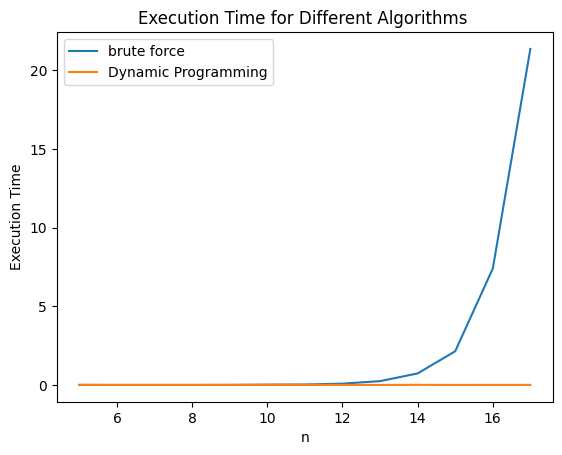

In [32]:
plt.plot(n, execution_time_list_brute_force, label="brute force")
plt.plot(n, execution_time_list_DP_matrix_chain, label="Dynamic Programming")

plt.xlabel("n")
plt.ylabel("Execution Time")
plt.title("Execution Time for Different Algorithms ")
plt.legend()
plt.show()